### Explore Bike Share Data

For this project, our goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York. 

In [1]:
# Import data
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
# View data snippet
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
# View data snippet
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
# View data snippet
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


Which city has the highest average travel time?

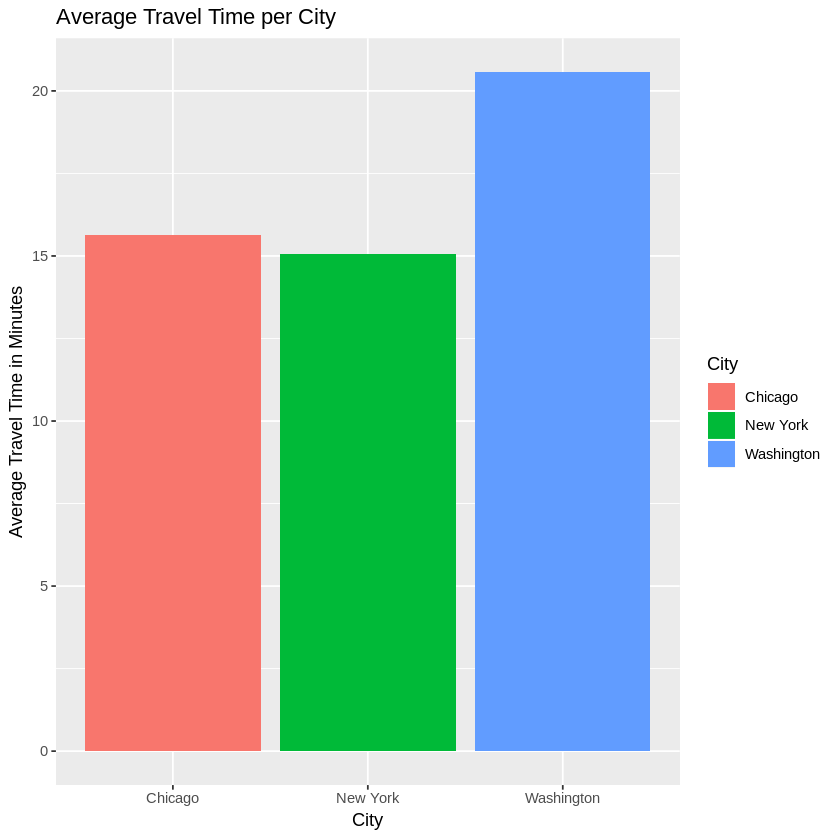

In [5]:
library(ggplot2)

# Calculate average travel time for all three cities
avg_travel_times <- data.frame(
    City = c("New York", "Washington", "Chicago"),
    Avg_Time = c(mean(ny$Trip.Duration, na.rm = TRUE),
                 mean(wash$Trip.Duration, na.rm = TRUE),
                 mean(chi$Trip.Duration, na.rm = TRUE)) / 60
)

# Create a bar chart to display the results
ggplot(avg_travel_times, aes(x = City, y = Avg_Time, fill = City)) +
    geom_bar(stat = "identity") + 
    labs(title = "Average Travel Time per City", x = "City", y = "Average Travel Time in Minutes")

Based on the data, the longest travel times on average take place in the city of Washington. Chicago and New York have similar travel time averages, with travel time in Chicago being slightly higher.

### Question 2

What is the most common start station in each city?

In [6]:
# Function to get top three stations
topThreeStations <- function(x, num = 3) {
    factor_x <- as.factor(x)
    freq <- table(factor_x)
    sorted_freq <- sort(freq, decreasing = TRUE)
    top_three_stations <- head(sorted_freq, num)
    return(top_three_stations)
}

# Collect top three start stations for each city
ny.start <- topThreeStations(ny$Start.Station)
wash.start <- topThreeStations(wash$Start.Station)
chi.start <- topThreeStations(chi$Start.Station)

# Create dataframe for each city
df_ny_start <- data.frame(
    City = "New York",
    Station = names(ny.start),
    Count = as.numeric(ny.start)
)

df_wash_start <- data.frame(
    City = "Washington",
    Station = names(wash.start),
    Count = as.numeric(wash.start)
)

df_chi_start <- data.frame(
    City = "Chicago",
    Station = names(chi.start),
    Count = as.numeric(chi.start)
)

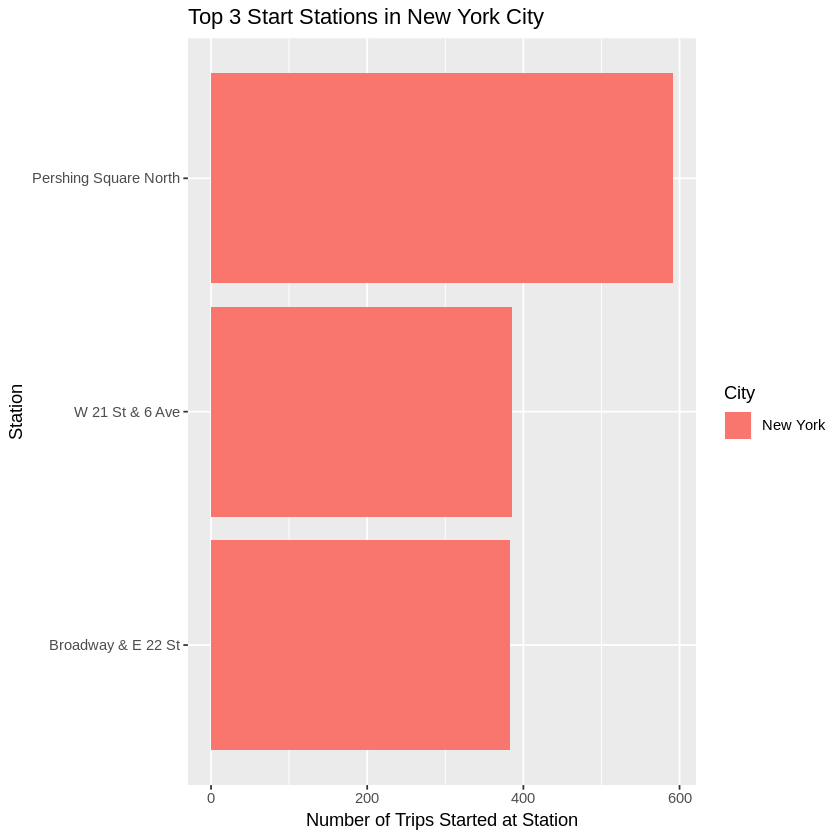

In [7]:
# Create visualization for New York
ggplot(df_ny_start, aes(x = reorder(Station, Count), y = Count, fill = City)) +
    geom_bar(stat = "identity") +
    labs(title = "Top 3 Start Stations in New York City", x = "Station", y = "Number of Trips Started at Station") +
    coord_flip()

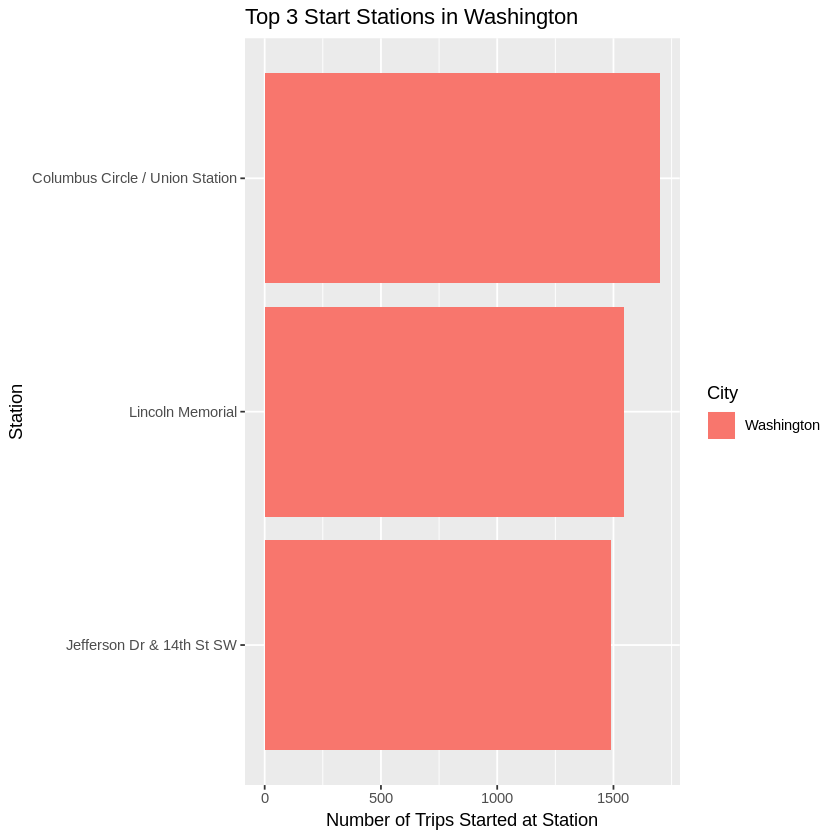

In [8]:
# Create visualization for Washington
ggplot(df_wash_start, aes(x = reorder(Station, Count), y = Count, fill = City)) +
    geom_bar(stat = "identity") +
    labs(title = "Top 3 Start Stations in Washington", x = "Station", y = "Number of Trips Started at Station") +
    coord_flip()

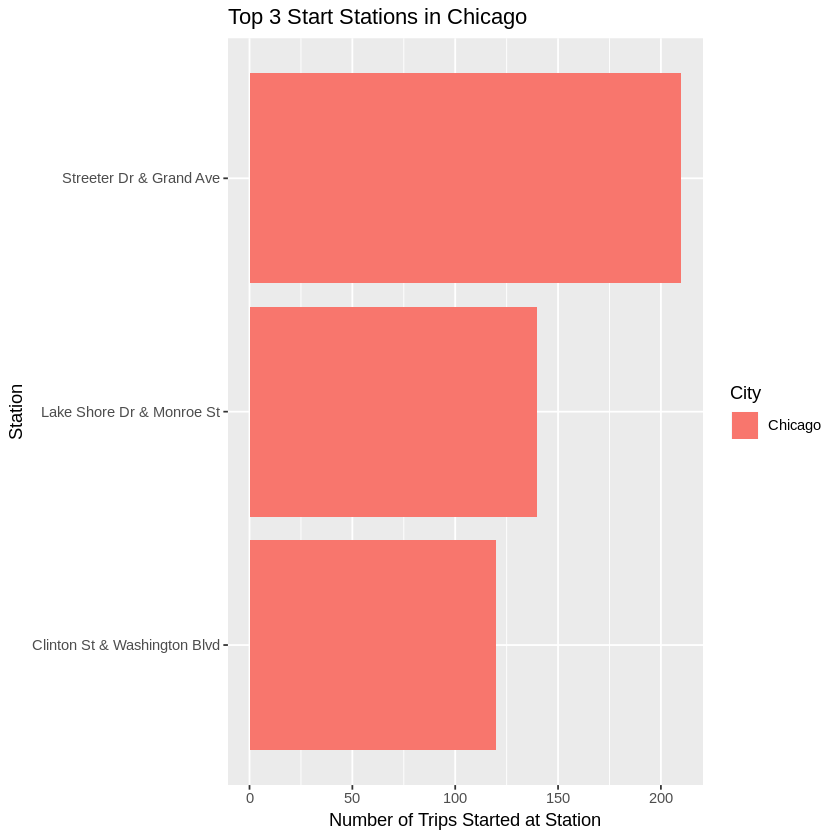

In [9]:
# Create visualization for Chicago
ggplot(df_chi_start, aes(x = reorder(Station, Count), y = Count, fill = City)) +
    geom_bar(stat = "identity") +
    labs(title = "Top 3 Start Stations in Chicago", x = "Station", y = "Number of Trips Started at Station") +
    coord_flip()

The most common start station in New York City is Pershing Square North. The most common start station in Washington is Columbus Circle / Union Station. The most common start station in Chicago is Streeter Dr & Grand Ave.

### Question 3

What is the most common end station in each city?

In [10]:
# Collect top three stations for each city
ny.end <- topThreeStations(ny$End.Station)
wash.end <- topThreeStations(wash$End.Station)
chi.end <- topThreeStations(chi$End.Station)

# Create dataframe for each city
df_ny_end <- data.frame(
    City = "New York",
    Station = names(ny.end),
    Count = as.numeric(ny.end)
)

df_wash_end <- data.frame(
    City = "Washington",
    Station = names(wash.end),
    Count = as.numeric(wash.end)
)

df_chi_end <- data.frame(
    City = "Chicago",
    Station = names(chi.end),
    Count = as.numeric(chi.end)
)

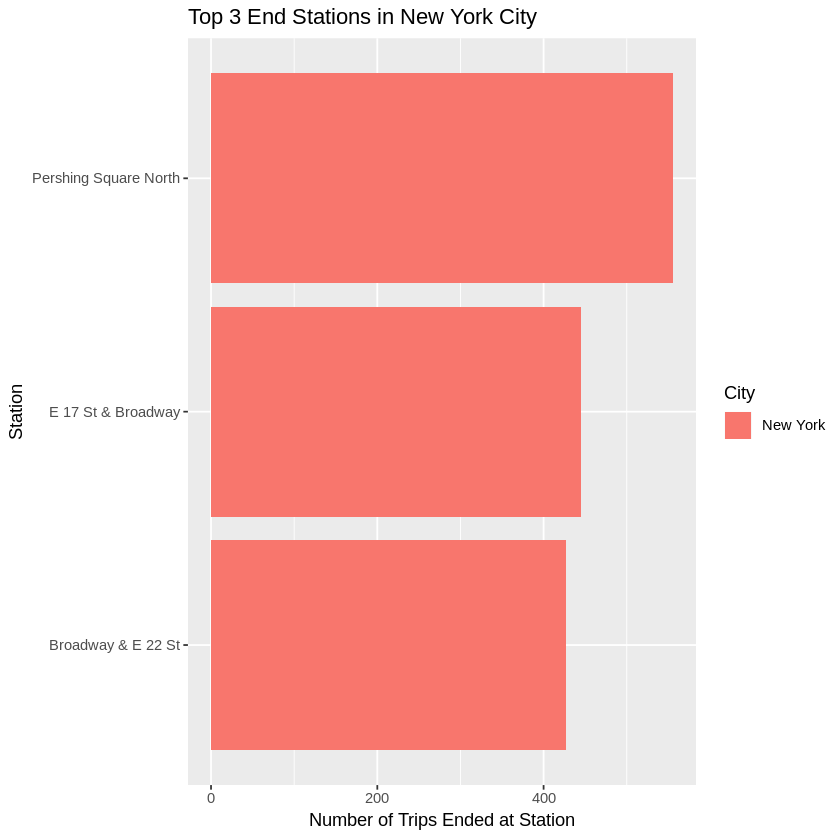

In [11]:
# Create visualization for New York
ggplot(df_ny_end, aes(x = reorder(Station, Count), y = Count, fill = City)) +
    geom_bar(stat = "identity") +
    labs(title = "Top 3 End Stations in New York City", x = "Station", y = "Number of Trips Ended at Station") +
    coord_flip()

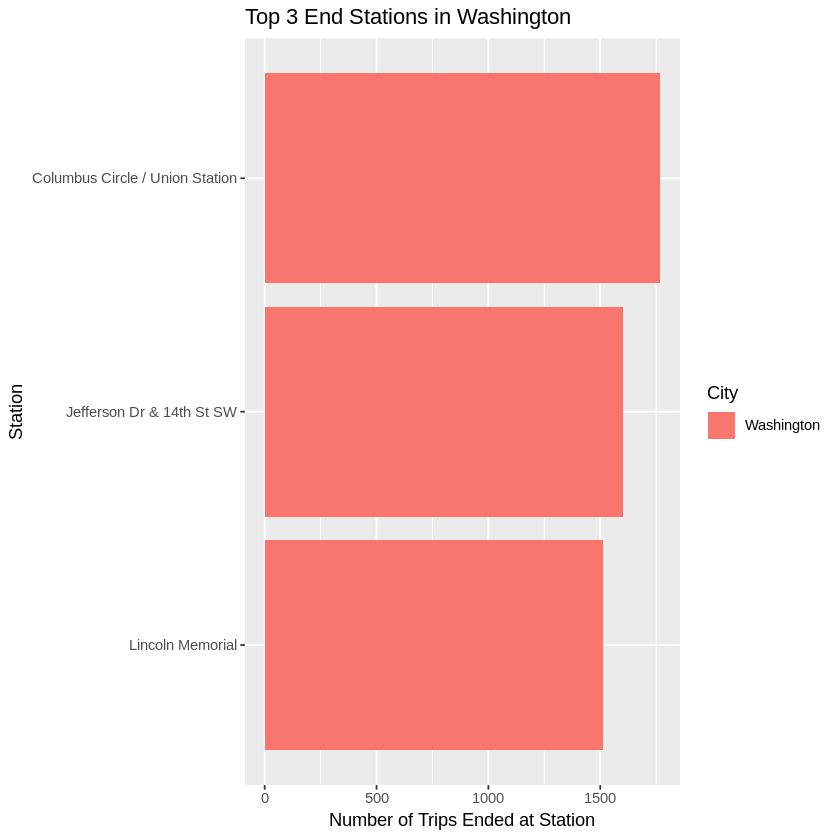

In [12]:
# Create visualization for Washington
ggplot(df_wash_end, aes(x = reorder(Station, Count), y = Count, fill = City)) +
    geom_bar(stat = "identity") +
    labs(title = "Top 3 End Stations in Washington", x = "Station", y = "Number of Trips Ended at Station") +
    coord_flip()

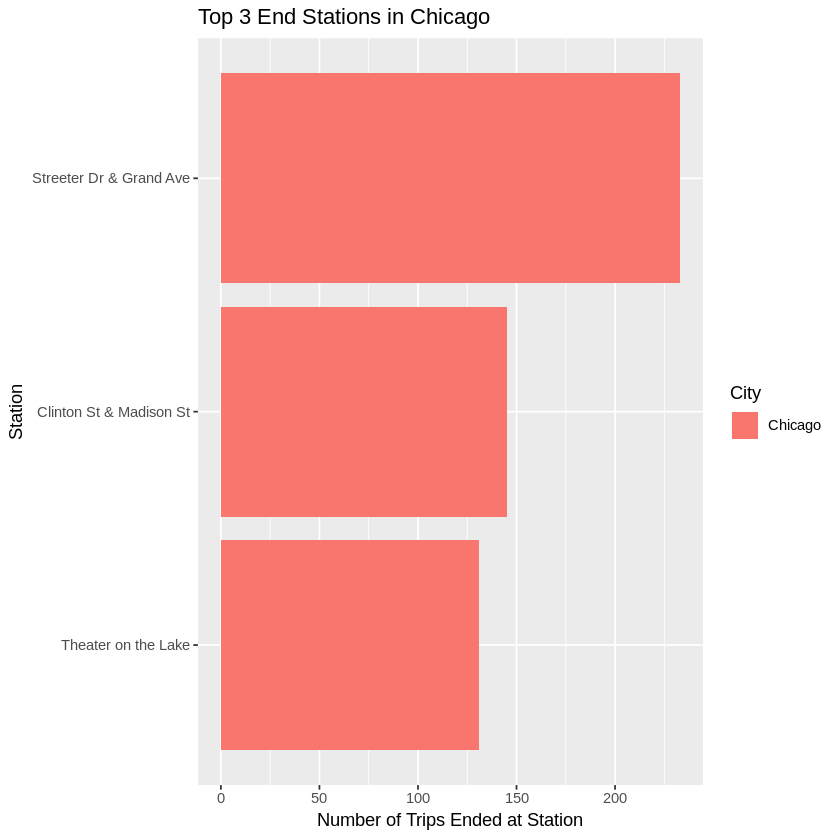

In [13]:
# Create visualization for Chicago
ggplot(df_chi_end, aes(x = reorder(Station, Count), y = Count, fill = City)) +
    geom_bar(stat = "identity") +
    labs(title = "Top 3 End Stations in Chicago", x = "Station", y = "Number of Trips Ended at Station") +
    coord_flip()

The most common end stations are the same as the most common start stations for all three cities. 

The most common end station in New York City is Pershing Square North. The most common end station in Washington is Columbus Circle / Union Station. The most common end station in Chicago is Streeter Dr & Grand Ave.

The second and third most common stations for each city does vary in comparison to the start stations.

## End

In [14]:
# Generate this notebook as a .html file 
system('python -m nbconvert Explore_bikeshare_data.ipynb')